In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
from pandas import DataFrame
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [ ]:
df=pd.read_csv("upsampled_kidney_disease.csv")

In [ ]:
df

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,102,17.0,60.0,1.010,0.0,0.0,NaN,normal,notpresent,notpresent,...,52.0,7000.0,NaN,no,no,no,good,no,no,1
1,348,38.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,44.0,7300.0,6.4,no,no,no,good,no,no,0
2,270,23.0,80.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,41.0,7200.0,5.0,no,no,no,good,no,no,0
3,106,50.0,90.0,NaN,NaN,NaN,NaN,NaN,notpresent,notpresent,...,17.0,6500.0,NaN,yes,yes,no,good,yes,yes,1
4,71,46.0,60.0,1.010,1.0,0.0,normal,normal,notpresent,notpresent,...,28.0,14600.0,3.2,yes,yes,no,good,no,no,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,226,64.0,100.0,1.015,4.0,2.0,abnormal,abnormal,notpresent,present,...,26.0,7500.0,3.4,yes,yes,no,good,yes,no,1
996,370,69.0,70.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,50.0,9300.0,5.4,no,no,no,good,no,no,0
997,14,68.0,80.0,1.010,3.0,2.0,normal,abnormal,present,present,...,16.0,11000.0,2.6,yes,yes,yes,poor,yes,no,1
998,191,NaN,70.0,1.010,3.0,0.0,normal,normal,notpresent,notpresent,...,26.0,9200.0,3.4,yes,yes,no,poor,no,no,1


CREATING DATASET

DATASET 1 [ BLOOD TEST + URINE TEST + OTHER TEST ]

In [ ]:
columns_to_drop = ['id', 'bp','rbc','pc','pcc','ba','pot','wc','cad','appet','pe','ane']
df=df.drop(columns=columns_to_drop)
df.to_csv('DB1.csv', index=False)

In [ ]:
db1=pd.read_csv("DB1.csv")
db1

,age,sg,al,su,bgr,bu,sc,sod,hemo,pcv,rc,htn,dm,classification
0,17.0,1.010,0.0,0.0,92.0,32.0,2.1,141.0,13.9,52.0,NaN,no,no,1
1,38.0,1.020,0.0,0.0,99.0,19.0,0.5,147.0,13.6,44.0,6.4,no,no,0
2,23.0,1.025,0.0,0.0,111.0,34.0,1.1,145.0,14.3,41.0,5.0,no,no,0
3,50.0,NaN,NaN,NaN,89.0,118.0,6.1,127.0,6.0,17.0,NaN,yes,yes,1
4,46.0,1.010,1.0,0.0,163.0,92.0,3.3,141.0,9.8,28.0,3.2,yes,yes,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,64.0,1.015,4.0,2.0,163.0,54.0,7.2,140.0,7.9,26.0,3.4,yes,yes,1
996,69.0,1.020,0.0,0.0,83.0,42.0,1.2,139.0,16.2,50.0,5.4,no,no,0
997,68.0,1.010,3.0,2.0,157.0,90.0,4.1,130.0,5.6,16.0,2.6,yes,yes,1
998,NaN,1.010,3.0,0.0,110.0,115.0,6.0,134.0,9.1,26.0,3.4,yes,yes,1


FILLING MISSING VALUES

In [ ]:
df['sg'] = df['sg'].fillna(1.005)

In [ ]:
df['al'] = df['al'].fillna(5)

In [ ]:
import random
lst = [1,2,3,4,5]
df['su'] = df['su'].fillna(random.choice(lst))

In [ ]:
for col in df.columns:
  if db1[col].dtypes=='float64':
    mean=db1[col].mean()
    db1[col].fillna(mean,inplace=True)

In [ ]:
cat_cols = db1.select_dtypes(include='object').columns
for col in cat_cols:
    mode_val = db1[col].mode()[0]
    db1[col].fillna(mode_val, inplace=True)

In [ ]:
label_encoder = preprocessing.LabelEncoder()
obj_cols = db1.select_dtypes(include=['object']).columns
for col in obj_cols:
    label_encoder.fit(db1[col].unique())
    db1[col] = label_encoder.transform(db1[col])



In [ ]:
db1.isnull().sum()

age               0
sg                0
al                0
su                0
bgr               0
bu                0
sc                0
sod               0
hemo              0
pcv               0
rc                0
htn               0
dm                0
classification    0
dtype: int64

In [ ]:
db1.head()

,age,sg,al,su,bgr,bu,sc,sod,hemo,pcv,rc,htn,dm,classification
0,17.0,1.010000,0.000000,0.000000,92.0,32.0,2.1,141.0,13.9,52.0,4.645217,0,0,1
1,38.0,1.020000,0.000000,0.000000,99.0,19.0,0.5,147.0,13.6,44.0,6.400000,0,0,0
2,23.0,1.025000,0.000000,0.000000,111.0,34.0,1.1,145.0,14.3,41.0,5.000000,0,0,0
3,50.0,1.017387,0.998876,0.434585,89.0,118.0,6.1,127.0,6.0,17.0,4.645217,1,1,1
4,46.0,1.010000,1.000000,0.000000,163.0,92.0,3.3,141.0,9.8,28.0,3.200000,1,1,1


RANDOM FOREST

In [ ]:
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
# Define the number of folds
n_splits = 10

# Initialize the KFold splitter
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Initialize the classifier
clf = RandomForestClassifier(n_estimators=10, max_depth=5, random_state=2)

# Initialize the score list
scores = []
f1_scores = []
specificities = []
sensitivities = []
precisions = []
auc_scores = []

# Loop over the splits and train/evaluate the model
for i, (train_index, test_index) in enumerate(kf.split(df)):
    X_train, X_test = db1.iloc[train_index, :-1], db1.iloc[test_index, :-1]
    y_train, y_test = db1.iloc[train_index, -1], db1.iloc[test_index, -1]
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    f1_score = report['1']['f1-score']
    specificity = report['0']['recall']
    sensitivity = report['1']['recall']
    precision = report['1']['precision']
    auc_score = roc_auc_score(y_test, y_pred)
    scores.append(score)
    f1_scores.append(f1_score)
    specificities.append(specificity)
    sensitivities.append(sensitivity)
    precisions.append(precision)
    auc_scores.append(auc_score)

# Compute the average scores
A=mean_score = sum(scores) / len(scores)
mean_f1_score = sum(f1_scores) / len(f1_scores)
mean_specificity = sum(specificities) / len(specificities)
mean_sensitivity = sum(sensitivities) / len(sensitivities)
mean_precision = sum(precisions) / len(precisions)
mean_auc_score = sum(auc_scores) / len(auc_scores)
print(f'Average score: {mean_score:.2f}, F1: {mean_f1_score:.2f}, Specificity: {mean_specificity:.2f}, Sensitivity: {mean_sensitivity:.2f}, Precision: {mean_precision:.2f}, AUC: {mean_auc_score:.2f}')


Average score: 1.00, F1: 1.00, Specificity: 0.99, Sensitivity: 1.00, Precision: 1.00, AUC: 1.00


GRADIENT BOOSTING

In [ ]:
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
# Define the number of folds
n_splits = 10

# Initialize the KFold splitter
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Initialize the classifier
gbclf = GradientBoostingClassifier(n_estimators=10, max_depth=5)

# Initialize the score list
scores = []
f1_scores = []
specificities = []
sensitivities = []
precisions = []
auc_scores = []

# Loop over the splits and train/evaluate the model
for i, (train_index, test_index) in enumerate(kf.split(df)):
    X_train, X_test = db1.iloc[train_index, :-1], db1.iloc[test_index, :-1]
    y_train, y_test = db1.iloc[train_index, -1], db1.iloc[test_index, -1]
    gbclf.fit(X_train, y_train)
    y_pred = gbclf.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    f1_score = report['1']['f1-score']
    specificity = report['0']['recall']
    sensitivity = report['1']['recall']
    precision = report['1']['precision']
    auc_score = roc_auc_score(y_test, y_pred)
    scores.append(score)
    f1_scores.append(f1_score)
    specificities.append(specificity)
    sensitivities.append(sensitivity)
    precisions.append(precision)
    auc_scores.append(auc_score)

# Compute the average scores
B=mean_score = sum(scores) / len(scores)
mean_f1_score = sum(f1_scores) / len(f1_scores)
mean_specificity = sum(specificities) / len(specificities)
mean_sensitivity = sum(sensitivities) / len(sensitivities)
mean_precision = sum(precisions) / len(precisions)
mean_auc_score = sum(auc_scores) / len(auc_scores)
print(f'Average score: {mean_score:.2f}, F1: {mean_f1_score:.2f}, Specificity: {mean_specificity:.2f}, Sensitivity: {mean_sensitivity:.2f}, Precision: {mean_precision:.2f}, AUC: {mean_auc_score:.2f}')


Average score: 1.00, F1: 1.00, Specificity: 0.99, Sensitivity: 1.00, Precision: 0.99, AUC: 0.99


XG BOOSTING

In [ ]:
import pandas as pd
from sklearn.model_selection import KFold
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
# Define the number of folds
n_splits = 10
X = db1.drop('classification', axis=1) # select all columns except the target column
y = db1['classification']
# Initialize the KFold splitter
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
xgb_model = xgb.XGBClassifier(eta=0.01,max_depth=3, colsample_bytree=0.2, scale_pos_weight=1.1, booster='gbtree')

# Initialize the score list
scores = []
f1_scores = []
specificities = []
sensitivities = []
precisions = []
auc_scores = []

# Loop over the splits and train/evaluate the model
for i, (train_index, test_index) in enumerate(kf.split(df)):
    X_train, X_test = db1.iloc[train_index, :-1], db1.iloc[test_index, :-1]
    y_train, y_test = db1.iloc[train_index, -1], db1.iloc[test_index, -1]
    xgb_model.fit(X_train._get_numeric_data(), np.ravel(y_train, order='C'))
    y_pred = xgb_model.predict(X_test._get_numeric_data())
    y_prob = xgb_model.predict_proba(X_test._get_numeric_data())[:,1]  # probability of positive class
    score = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    f1_score = report['1']['f1-score']
    specificity = report['0']['recall']
    sensitivity = report['1']['recall']
    precision = report['1']['precision']
    auc_score = roc_auc_score(y_test, y_prob)
    scores.append(score)
    f1_scores.append(f1_score)
    specificities.append(specificity)
    sensitivities.append(sensitivity)
    precisions.append(precision)
    auc_scores.append(auc_score)

# Compute the average scores
C=mean_score = sum(scores) / len(scores)
mean_f1_score = sum(f1_scores) / len(f1_scores)
mean_specificity = sum(specificities) / len(specificities)
mean_sensitivity = sum(sensitivities) / len(sensitivities)
mean_precision = sum(precisions) / len(precisions)
mean_auc_score = sum(auc_scores) / len(auc_scores)
print(f'Average score: {mean_score:.2f}, F1: {mean_f1_score:.2f}, Specificity: {mean_specificity:.2f}, Sensitivity: {mean_sensitivity:.2f}, Precision: {mean_precision:.2f}, AUC: {mean_auc_score:.2f}')


Average score: 0.99, F1: 0.99, Specificity: 0.99, Sensitivity: 0.99, Precision: 1.00, AUC: 1.00


LOGISTICS REGRESSION

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
# Define the number of folds
n_splits = 10
X = db1.drop('classification', axis=1) # select all columns except the target column
y = db1['classification']
# Initialize the KFold splitter
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Initialize the classifier
lr = LogisticRegression()

# Initialize the score list
scores = []
f1_scores = []
specificities = []
sensitivities = []
precisions = []
auc_scores = []

# Loop over the splits and train/evaluate the model
for i, (train_index, test_index) in enumerate(kf.split(df)):
    X_train, X_test = db1.iloc[train_index, :-1], db1.iloc[test_index, :-1]
    y_train, y_test = db1.iloc[train_index, -1], db1.iloc[test_index, -1]
    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    f1_score = report['1']['f1-score']
    specificity = report['0']['recall']
    sensitivity = report['1']['recall']
    precision = report['1']['precision']
    auc_score = roc_auc_score(y_test, y_pred)
    scores.append(score)
    f1_scores.append(f1_score)
    specificities.append(specificity)
    sensitivities.append(sensitivity)
    precisions.append(precision)
    auc_scores.append(auc_score)

# Compute the average scores
D=mean_score = sum(scores) / len(scores)
mean_f1_score = sum(f1_scores) / len(f1_scores)
mean_specificity = sum(specificities) / len(specificities)
mean_sensitivity = sum(sensitivities) / len(sensitivities)
mean_precision = sum(precisions) / len(precisions)
mean_auc_score = sum(auc_scores) / len(auc_scores)
print(f'Average score: {mean_score:.2f}, F1: {mean_f1_score:.2f}, Specificity: {mean_specificity:.2f}, Sensitivity: {mean_sensitivity:.2f}, Precision: {mean_precision:.2f}, AUC: {mean_auc_score:.2f}')


Average score: 0.98, F1: 0.98, Specificity: 0.98, Sensitivity: 0.98, Precision: 0.99, AUC: 0.98


SUPPORT VECTOR MACHINE

In [ ]:
from sklearn.model_selection import cross_val_predict, StratifiedKFold
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, accuracy_score
X = db1.drop('classification', axis=1)
y = db1['classification']
# define SVM classifier with desired hyperparameters
svm = SVC(kernel='rbf', C=15, gamma=0.5)

# perform 10-fold cross-validation
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
y_pred = cross_val_predict(svm, X, y, cv=cv)

# calculate evaluation metrics
tn, fp, fn, tp = confusion_matrix(y, y_pred).ravel()
specificity = tn / (tn+fp)
sensitivity = recall_score(y, y_pred)
auc = roc_auc_score(y, y_pred)
f1 = f1_score(y, y_pred)
precision = precision_score(y, y_pred)
E=accuracy = accuracy_score(y, y_pred)

# print the evaluation metrics
print("Accuracy:", accuracy)
print("Specificity:", specificity)
print("Sensitivity:", sensitivity)
print("AUC:", auc)
print("F1 Score:", f1)
print("Precision:", precision)


Accuracy: 0.964
Specificity: 0.904
Sensitivity: 1.0
AUC: 0.9520000000000001
F1 Score: 0.9720062208398135
Precision: 0.9455370650529501


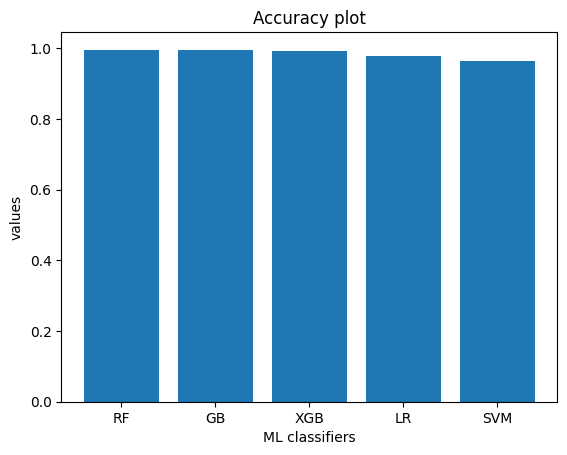

In [ ]:
import matplotlib.pyplot as plt

# Sample data
x = ['RF', 'GB', 'XGB', 'LR','SVM']
y = [A, B, C, D, E]

# Create a bar plot
plt.bar(x, y)

# Set the title and labels for the plot
plt.title('Accuracy plot')
plt.xlabel('ML classifiers')
plt.ylabel('values')

# Show the plot
plt.show()

DATASET 2 [ BLOOD TEST + OTHER TEST ]

In [ ]:
df=pd.read_csv("upsampled_kidney_disease.csv")

In [ ]:
columns_to_drop = ['id', 'bp','rbc','pc','pcc','ba','pot','wc','cad','appet','pe','ane','sg','al',"su"]
df=df.drop(columns=columns_to_drop)
df.to_csv('DB2.csv', index=False)

In [ ]:
db2=pd.read_csv("DB2.csv")
db2

,age,bgr,bu,sc,sod,hemo,pcv,rc,htn,dm,classification
0,17.0,92.0,32.0,2.1,141.0,13.9,52.0,NaN,no,no,1
1,38.0,99.0,19.0,0.5,147.0,13.6,44.0,6.4,no,no,0
2,23.0,111.0,34.0,1.1,145.0,14.3,41.0,5.0,no,no,0
3,50.0,89.0,118.0,6.1,127.0,6.0,17.0,NaN,yes,yes,1
4,46.0,163.0,92.0,3.3,141.0,9.8,28.0,3.2,yes,yes,1
...,...,...,...,...,...,...,...,...,...,...,...
995,64.0,163.0,54.0,7.2,140.0,7.9,26.0,3.4,yes,yes,1
996,69.0,83.0,42.0,1.2,139.0,16.2,50.0,5.4,no,no,0
997,68.0,157.0,90.0,4.1,130.0,5.6,16.0,2.6,yes,yes,1
998,NaN,110.0,115.0,6.0,134.0,9.1,26.0,3.4,yes,yes,1


In [ ]:
for col in df.columns:
  if db2[col].dtypes=='float64':
    mean=db2[col].mean()
    db2[col].fillna(mean,inplace=True)

In [ ]:
cat_cols = db2.select_dtypes(include='object').columns
for col in cat_cols:
    mode_val = db2[col].mode()[0]
    db2[col].fillna(mode_val, inplace=True)

In [ ]:
label_encoder = preprocessing.LabelEncoder()
obj_cols = db2.select_dtypes(include=['object']).columns
for col in obj_cols:
    label_encoder.fit(db2[col].unique())
    db2[col] = label_encoder.transform(db2[col])



In [ ]:
db2.isnull().sum()

age               0
bgr               0
bu                0
sc                0
sod               0
hemo              0
pcv               0
rc                0
htn               0
dm                0
classification    0
dtype: int64

RANDOM FOREST

In [ ]:
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
# Define the number of folds
n_splits = 10

# Initialize the KFold splitter
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Initialize the classifier
clf = RandomForestClassifier(n_estimators=10, max_depth=5, random_state=2)

# Initialize the score list
scores = []
f1_scores = []
specificities = []
sensitivities = []
precisions = []
auc_scores = []

# Loop over the splits and train/evaluate the model
for i, (train_index, test_index) in enumerate(kf.split(df)):
    X_train, X_test = db2.iloc[train_index, :-1], db2.iloc[test_index, :-1]
    y_train, y_test = db2.iloc[train_index, -1], db2.iloc[test_index, -1]
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    f1_score = report['1']['f1-score']
    specificity = report['0']['recall']
    sensitivity = report['1']['recall']
    precision = report['1']['precision']
    auc_score = roc_auc_score(y_test, y_pred)
    scores.append(score)
    f1_scores.append(f1_score)
    specificities.append(specificity)
    sensitivities.append(sensitivity)
    precisions.append(precision)
    auc_scores.append(auc_score)

# Compute the average scores
mean_score = sum(scores) / len(scores)
A= mean_score
mean_f1_score = sum(f1_scores) / len(f1_scores)
mean_specificity = sum(specificities) / len(specificities)
mean_sensitivity = sum(sensitivities) / len(sensitivities)
mean_precision = sum(precisions) / len(precisions)
mean_auc_score = sum(auc_scores) / len(auc_scores)
print(f'Average score: {mean_score:.2f}, F1: {mean_f1_score:.2f}, Specificity: {mean_specificity:.2f}, Sensitivity: {mean_sensitivity:.2f}, Precision: {mean_precision:.2f}, AUC: {mean_auc_score:.2f}')


Average score: 0.99, F1: 0.99, Specificity: 0.99, Sensitivity: 0.99, Precision: 0.99, AUC: 0.99


GRADIENT BOOSTING

In [ ]:
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
# Define the number of folds
n_splits = 10

# Initialize the KFold splitter
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Initialize the classifier
gbclf = GradientBoostingClassifier(n_estimators=10, max_depth=5)

# Initialize the score list
scores = []
f1_scores = []
specificities = []
sensitivities = []
precisions = []
auc_scores = []

# Loop over the splits and train/evaluate the model
for i, (train_index, test_index) in enumerate(kf.split(df)):
    X_train, X_test = db2.iloc[train_index, :-1], db2.iloc[test_index, :-1]
    y_train, y_test = db2.iloc[train_index, -1], db2.iloc[test_index, -1]
    gbclf.fit(X_train, y_train)
    y_pred = gbclf.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    f1_score = report['1']['f1-score']
    specificity = report['0']['recall']
    sensitivity = report['1']['recall']
    precision = report['1']['precision']
    auc_score = roc_auc_score(y_test, y_pred)
    scores.append(score)
    f1_scores.append(f1_score)
    specificities.append(specificity)
    sensitivities.append(sensitivity)
    precisions.append(precision)
    auc_scores.append(auc_score)

# Compute the average scores
mean_score = sum(scores) / len(scores)
B=mean_score
mean_f1_score = sum(f1_scores) / len(f1_scores)
mean_specificity = sum(specificities) / len(specificities)
mean_sensitivity = sum(sensitivities) / len(sensitivities)
mean_precision = sum(precisions) / len(precisions)
mean_auc_score = sum(auc_scores) / len(auc_scores)
print(f'Average score: {mean_score:.2f}, F1: {mean_f1_score:.2f}, Specificity: {mean_specificity:.2f}, Sensitivity: {mean_sensitivity:.2f}, Precision: {mean_precision:.2f}, AUC: {mean_auc_score:.2f}')


Average score: 0.99, F1: 0.99, Specificity: 0.99, Sensitivity: 1.00, Precision: 0.99, AUC: 0.99


XG BOOSTING

In [ ]:
import pandas as pd
from sklearn.model_selection import KFold
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
# Define the number of folds
n_splits = 10
X = db2.drop('classification', axis=1) # select all columns except the target column
y = db2['classification']
# Initialize the KFold splitter
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
xgb_model = xgb.XGBClassifier(eta=0.01,max_depth=3, colsample_bytree=0.2, scale_pos_weight=1.1, booster='gbtree')

# Initialize the score list
scores = []
f1_scores = []
specificities = []
sensitivities = []
precisions = []
auc_scores = []

# Loop over the splits and train/evaluate the model
for i, (train_index, test_index) in enumerate(kf.split(df)):
    X_train, X_test = db2.iloc[train_index, :-1], db2.iloc[test_index, :-1]
    y_train, y_test = db2.iloc[train_index, -1], db2.iloc[test_index, -1]
    xgb_model.fit(X_train._get_numeric_data(), np.ravel(y_train, order='C'))
    y_pred = xgb_model.predict(X_test._get_numeric_data())
    y_prob = xgb_model.predict_proba(X_test._get_numeric_data())[:,1]  # probability of positive class
    score = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    f1_score = report['1']['f1-score']
    specificity = report['0']['recall']
    sensitivity = report['1']['recall']
    precision = report['1']['precision']
    auc_score = roc_auc_score(y_test, y_prob)
    scores.append(score)
    f1_scores.append(f1_score)
    specificities.append(specificity)
    sensitivities.append(sensitivity)
    precisions.append(precision)
    auc_scores.append(auc_score)

# Compute the average scores
mean_score = sum(scores) / len(scores)
C=mean_score
mean_f1_score = sum(f1_scores) / len(f1_scores)
mean_specificity = sum(specificities) / len(specificities)
mean_sensitivity = sum(sensitivities) / len(sensitivities)
mean_precision = sum(precisions) / len(precisions)
mean_auc_score = sum(auc_scores) / len(auc_scores)
print(f'Average score: {mean_score:.2f}, F1: {mean_f1_score:.2f}, Specificity: {mean_specificity:.2f}, Sensitivity: {mean_sensitivity:.2f}, Precision: {mean_precision:.2f}, AUC: {mean_auc_score:.2f}')


Average score: 0.98, F1: 0.98, Specificity: 0.97, Sensitivity: 0.99, Precision: 0.98, AUC: 1.00


LOGISTICS REGRESSION

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
# Define the number of folds
n_splits = 10
X = db2.drop('classification', axis=1) # select all columns except the target column
y = db2['classification']
# Initialize the KFold splitter
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Initialize the classifier
lr = LogisticRegression()

# Initialize the score list
scores = []
f1_scores = []
specificities = []
sensitivities = []
precisions = []
auc_scores = []

# Loop over the splits and train/evaluate the model
for i, (train_index, test_index) in enumerate(kf.split(df)):
    X_train, X_test = db2.iloc[train_index, :-1], db2.iloc[test_index, :-1]
    y_train, y_test = db2.iloc[train_index, -1], db2.iloc[test_index, -1]
    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    f1_score = report['1']['f1-score']
    specificity = report['0']['recall']
    sensitivity = report['1']['recall']
    precision = report['1']['precision']
    auc_score = roc_auc_score(y_test, y_pred)
    scores.append(score)
    f1_scores.append(f1_score)
    specificities.append(specificity)
    sensitivities.append(sensitivity)
    precisions.append(precision)
    auc_scores.append(auc_score)

# Compute the average scores
mean_score = sum(scores) / len(scores)
D=mean_score
mean_f1_score = sum(f1_scores) / len(f1_scores)
mean_specificity = sum(specificities) / len(specificities)
mean_sensitivity = sum(sensitivities) / len(sensitivities)
mean_precision = sum(precisions) / len(precisions)
mean_auc_score = sum(auc_scores) / len(auc_scores)
print(f'Average score: {mean_score:.2f}, F1: {mean_f1_score:.2f}, Specificity: {mean_specificity:.2f}, Sensitivity: {mean_sensitivity:.2f}, Precision: {mean_precision:.2f}, AUC: {mean_auc_score:.2f}')


Average score: 0.96, F1: 0.96, Specificity: 0.94, Sensitivity: 0.97, Precision: 0.96, AUC: 0.96


SUPPORT VECTOR MACHINE

In [ ]:
from sklearn.model_selection import cross_val_predict, StratifiedKFold
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, accuracy_score
X = db2.drop('classification', axis=1)
y = db2['classification']
# define SVM classifier with desired hyperparameters
svm = SVC(kernel='rbf', C=15, gamma=0.5)

# perform 10-fold cross-validation
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
y_pred = cross_val_predict(svm, X, y, cv=cv)

# calculate evaluation metrics
tn, fp, fn, tp = confusion_matrix(y, y_pred).ravel()
specificity = tn / (tn+fp)
sensitivity = recall_score(y, y_pred)
auc = roc_auc_score(y, y_pred)
f1 = f1_score(y, y_pred)
precision = precision_score(y, y_pred)
accuracy = accuracy_score(y, y_pred)
E=accuracy
# print the evaluation metrics
print("Accuracy:", accuracy)
print("Specificity:", specificity)
print("Sensitivity:", sensitivity)
print("AUC:", auc)
print("F1 Score:", f1)
print("Precision:", precision)


Accuracy: 0.964
Specificity: 0.904
Sensitivity: 1.0
AUC: 0.9520000000000001
F1 Score: 0.9720062208398135
Precision: 0.9455370650529501


ACCURACY PLOT

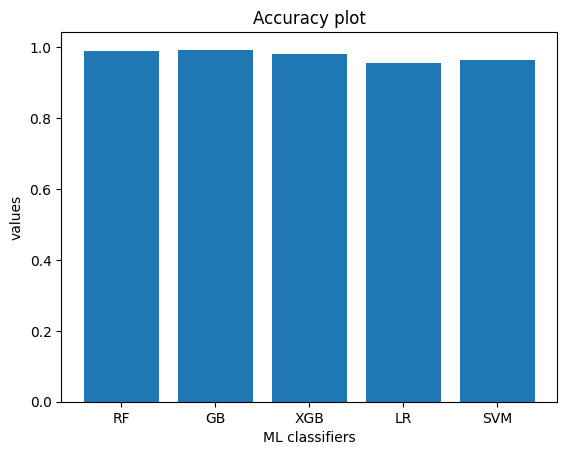

In [ ]:
import matplotlib.pyplot as plt

# Sample data
x = ['RF', 'GB', 'XGB', 'LR','SVM']
y = [A, B, C, D, E]

# Create a bar plot
plt.bar(x, y)

# Set the title and labels for the plot
plt.title('Accuracy plot')
plt.xlabel('ML classifiers')
plt.ylabel('values')

# Show the plot
plt.show()

DATASET 3 [ URINE TEST + OTHER TEST ]

In [ ]:
df=pd.read_csv("upsampled_kidney_disease.csv")

In [ ]:
df

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,102,17.0,60.0,1.010,0.0,0.0,NaN,normal,notpresent,notpresent,...,52.0,7000.0,NaN,no,no,no,good,no,no,1
1,348,38.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,44.0,7300.0,6.4,no,no,no,good,no,no,0
2,270,23.0,80.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,41.0,7200.0,5.0,no,no,no,good,no,no,0
3,106,50.0,90.0,NaN,NaN,NaN,NaN,NaN,notpresent,notpresent,...,17.0,6500.0,NaN,yes,yes,no,good,yes,yes,1
4,71,46.0,60.0,1.010,1.0,0.0,normal,normal,notpresent,notpresent,...,28.0,14600.0,3.2,yes,yes,no,good,no,no,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,226,64.0,100.0,1.015,4.0,2.0,abnormal,abnormal,notpresent,present,...,26.0,7500.0,3.4,yes,yes,no,good,yes,no,1
996,370,69.0,70.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,50.0,9300.0,5.4,no,no,no,good,no,no,0
997,14,68.0,80.0,1.010,3.0,2.0,normal,abnormal,present,present,...,16.0,11000.0,2.6,yes,yes,yes,poor,yes,no,1
998,191,NaN,70.0,1.010,3.0,0.0,normal,normal,notpresent,notpresent,...,26.0,9200.0,3.4,yes,yes,no,poor,no,no,1


In [ ]:
columns_to_drop = ['id', 'bp','rbc','pc','pcc','ba','pot','wc','cad','appet','pe','ane','hemo','sc','pcv','bgr','bu','rc','sod',]
df=df.drop(columns=columns_to_drop)
df.to_csv('DB3.csv', index=False)

In [ ]:
db3=pd.read_csv("DB3.csv")
db3

,age,sg,al,su,htn,dm,classification
0,17.0,1.010,0.0,0.0,no,no,1
1,38.0,1.020,0.0,0.0,no,no,0
2,23.0,1.025,0.0,0.0,no,no,0
3,50.0,NaN,NaN,NaN,yes,yes,1
4,46.0,1.010,1.0,0.0,yes,yes,1
...,...,...,...,...,...,...,...
995,64.0,1.015,4.0,2.0,yes,yes,1
996,69.0,1.020,0.0,0.0,no,no,0
997,68.0,1.010,3.0,2.0,yes,yes,1
998,NaN,1.010,3.0,0.0,yes,yes,1


In [ ]:
df['sg'] = df['sg'].fillna(1.005)

In [ ]:
df['al'] = df['al'].fillna(5)

In [ ]:
import random
lst = [1,2,3,4,5]
df['su'] = df['su'].fillna(random.choice(lst))

In [ ]:
for col in df.columns:
  if db3[col].dtypes=='float64':
    mean=db3[col].mean()
    db3[col].fillna(mean,inplace=True)

In [ ]:
cat_cols = db3.select_dtypes(include='object').columns
for col in cat_cols:
    mode_val = db3[col].mode()[0]
    db3[col].fillna(mode_val, inplace=True)

In [ ]:
label_encoder = preprocessing.LabelEncoder()
obj_cols = db3.select_dtypes(include=['object']).columns
for col in obj_cols:
    label_encoder.fit(db3[col].unique())
    db3[col] = label_encoder.transform(db3[col])



In [ ]:
db3.head()

,age,sg,al,su,htn,dm,classification
0,17.0,1.010000,0.000000,0.000000,0,0,1
1,38.0,1.020000,0.000000,0.000000,0,0,0
2,23.0,1.025000,0.000000,0.000000,0,0,0
3,50.0,1.017387,0.998876,0.434585,1,1,1
4,46.0,1.010000,1.000000,0.000000,1,1,1


RANDOM FOREST

In [ ]:
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
# Define the number of folds
n_splits = 10

# Initialize the KFold splitter
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Initialize the classifier
clf = RandomForestClassifier(n_estimators=10, max_depth=5, random_state=2)

# Initialize the score list
scores = []
f1_scores = []
specificities = []
sensitivities = []
precisions = []
auc_scores = []

# Loop over the splits and train/evaluate the model
for i, (train_index, test_index) in enumerate(kf.split(df)):
    X_train, X_test = db3.iloc[train_index, :-1], db3.iloc[test_index, :-1]
    y_train, y_test = db3.iloc[train_index, -1], db3.iloc[test_index, -1]
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    f1_score = report['1']['f1-score']
    specificity = report['0']['recall']
    sensitivity = report['1']['recall']
    precision = report['1']['precision']
    auc_score = roc_auc_score(y_test, y_pred)
    scores.append(score)
    f1_scores.append(f1_score)
    specificities.append(specificity)
    sensitivities.append(sensitivity)
    precisions.append(precision)
    auc_scores.append(auc_score)

# Compute the average scores
A=mean_score = sum(scores) / len(scores)
mean_f1_score = sum(f1_scores) / len(f1_scores)
mean_specificity = sum(specificities) / len(specificities)
mean_sensitivity = sum(sensitivities) / len(sensitivities)
mean_precision = sum(precisions) / len(precisions)
mean_auc_score = sum(auc_scores) / len(auc_scores)
print(f'Average score: {mean_score:.2f}, F1: {mean_f1_score:.2f}, Specificity: {mean_specificity:.2f}, Sensitivity: {mean_sensitivity:.2f}, Precision: {mean_precision:.2f}, AUC: {mean_auc_score:.2f}')


Average score: 0.99, F1: 0.99, Specificity: 1.00, Sensitivity: 0.98, Precision: 1.00, AUC: 0.99


GRADIENT BOOSTING

In [ ]:
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
# Define the number of folds
n_splits = 10

# Initialize the KFold splitter
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Initialize the classifier
gbclf = GradientBoostingClassifier(n_estimators=10, max_depth=5)

# Initialize the score list
scores = []
f1_scores = []
specificities = []
sensitivities = []
precisions = []
auc_scores = []

# Loop over the splits and train/evaluate the model
for i, (train_index, test_index) in enumerate(kf.split(df)):
    X_train, X_test = db3.iloc[train_index, :-1], db3.iloc[test_index, :-1]
    y_train, y_test = db3.iloc[train_index, -1], db3.iloc[test_index, -1]
    gbclf.fit(X_train, y_train)
    y_pred = gbclf.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    f1_score = report['1']['f1-score']
    specificity = report['0']['recall']
    sensitivity = report['1']['recall']
    precision = report['1']['precision']
    auc_score = roc_auc_score(y_test, y_pred)
    scores.append(score)
    f1_scores.append(f1_score)
    specificities.append(specificity)
    sensitivities.append(sensitivity)
    precisions.append(precision)
    auc_scores.append(auc_score)

# Compute the average scores
B=mean_score = sum(scores) / len(scores)
mean_f1_score = sum(f1_scores) / len(f1_scores)
mean_specificity = sum(specificities) / len(specificities)
mean_sensitivity = sum(sensitivities) / len(sensitivities)
mean_precision = sum(precisions) / len(precisions)
mean_auc_score = sum(auc_scores) / len(auc_scores)
print(f'Average score: {mean_score:.2f}, F1: {mean_f1_score:.2f}, Specificity: {mean_specificity:.2f}, Sensitivity: {mean_sensitivity:.2f}, Precision: {mean_precision:.2f}, AUC: {mean_auc_score:.2f}')


Average score: 0.99, F1: 0.99, Specificity: 1.00, Sensitivity: 0.98, Precision: 1.00, AUC: 0.99


XG BOOSTING

In [ ]:
import pandas as pd
from sklearn.model_selection import KFold
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
# Define the number of folds
n_splits = 10
X = db3.drop('classification', axis=1) # select all columns except the target column
y = db3['classification']
# Initialize the KFold splitter
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
xgb_model = xgb.XGBClassifier(eta=0.01,max_depth=3, colsample_bytree=0.2, scale_pos_weight=1.1, booster='gbtree')

# Initialize the score list
scores = []
f1_scores = []
specificities = []
sensitivities = []
precisions = []
auc_scores = []

# Loop over the splits and train/evaluate the model
for i, (train_index, test_index) in enumerate(kf.split(df)):
    X_train, X_test = db3.iloc[train_index, :-1], db3.iloc[test_index, :-1]
    y_train, y_test = db3.iloc[train_index, -1], db3.iloc[test_index, -1]
    xgb_model.fit(X_train._get_numeric_data(), np.ravel(y_train, order='C'))
    y_pred = xgb_model.predict(X_test._get_numeric_data())
    y_prob = xgb_model.predict_proba(X_test._get_numeric_data())[:,1]  # probability of positive class
    score = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    f1_score = report['1']['f1-score']
    specificity = report['0']['recall']
    sensitivity = report['1']['recall']
    precision = report['1']['precision']
    auc_score = roc_auc_score(y_test, y_prob)
    scores.append(score)
    f1_scores.append(f1_score)
    specificities.append(specificity)
    sensitivities.append(sensitivity)
    precisions.append(precision)
    auc_scores.append(auc_score)

# Compute the average scores
C=mean_score = sum(scores) / len(scores)
mean_f1_score = sum(f1_scores) / len(f1_scores)
mean_specificity = sum(specificities) / len(specificities)
mean_sensitivity = sum(sensitivities) / len(sensitivities)
mean_precision = sum(precisions) / len(precisions)
mean_auc_score = sum(auc_scores) / len(auc_scores)
print(f'Average score: {mean_score:.2f}, F1: {mean_f1_score:.2f}, Specificity: {mean_specificity:.2f}, Sensitivity: {mean_sensitivity:.2f}, Precision: {mean_precision:.2f}, AUC: {mean_auc_score:.2f}')


Average score: 0.96, F1: 0.97, Specificity: 0.98, Sensitivity: 0.95, Precision: 0.99, AUC: 0.99


LOGISTIC REGRESSION

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
# Define the number of folds
n_splits = 10
X = db3.drop('classification', axis=1) # select all columns except the target column
y = db3['classification']
# Initialize the KFold splitter
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Initialize the classifier
lr = LogisticRegression()

# Initialize the score list
scores = []
f1_scores = []
specificities = []
sensitivities = []
precisions = []
auc_scores = []

# Loop over the splits and train/evaluate the model
for i, (train_index, test_index) in enumerate(kf.split(df)):
    X_train, X_test = db3.iloc[train_index, :-1], db3.iloc[test_index, :-1]
    y_train, y_test = db3.iloc[train_index, -1], db3.iloc[test_index, -1]
    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    f1_score = report['1']['f1-score']
    specificity = report['0']['recall']
    sensitivity = report['1']['recall']
    precision = report['1']['precision']
    auc_score = roc_auc_score(y_test, y_pred)
    scores.append(score)
    f1_scores.append(f1_score)
    specificities.append(specificity)
    sensitivities.append(sensitivity)
    precisions.append(precision)
    auc_scores.append(auc_score)

# Compute the average scores
D=mean_score = sum(scores) / len(scores)
mean_f1_score = sum(f1_scores) / len(f1_scores)
mean_specificity = sum(specificities) / len(specificities)
mean_sensitivity = sum(sensitivities) / len(sensitivities)
mean_precision = sum(precisions) / len(precisions)
mean_auc_score = sum(auc_scores) / len(auc_scores)
print(f'Average score: {mean_score:.2f}, F1: {mean_f1_score:.2f}, Specificity: {mean_specificity:.2f}, Sensitivity: {mean_sensitivity:.2f}, Precision: {mean_precision:.2f}, AUC: {mean_auc_score:.2f}')


Average score: 0.94, F1: 0.95, Specificity: 0.98, Sensitivity: 0.92, Precision: 0.99, AUC: 0.95


SUPPORT VECTOR MACHINE

In [ ]:
from sklearn.model_selection import cross_val_predict, StratifiedKFold
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, accuracy_score
X = db3.drop('classification', axis=1)
y = db3['classification']
# define SVM classifier with desired hyperparameters
svm = SVC(kernel='rbf', C=15, gamma=0.5)

# perform 10-fold cross-validation
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
y_pred = cross_val_predict(svm, X, y, cv=cv)

# calculate evaluation metrics
tn, fp, fn, tp = confusion_matrix(y, y_pred).ravel()
specificity = tn / (tn+fp)
sensitivity = recall_score(y, y_pred)
auc = roc_auc_score(y, y_pred)
f1 = f1_score(y, y_pred)
precision = precision_score(y, y_pred)
E=accuracy = accuracy_score(y, y_pred)

# print the evaluation metrics
print("Accuracy:", accuracy)
print("Specificity:", specificity)
print("Sensitivity:", sensitivity)
print("AUC:", auc)
print("F1 Score:", f1)
print("Precision:", precision)


Accuracy: 0.955
Specificity: 0.9706666666666667
Sensitivity: 0.9456
AUC: 0.9581333333333334
F1 Score: 0.9633251833740832
Precision: 0.9817275747508306


ACCURACY PLOT

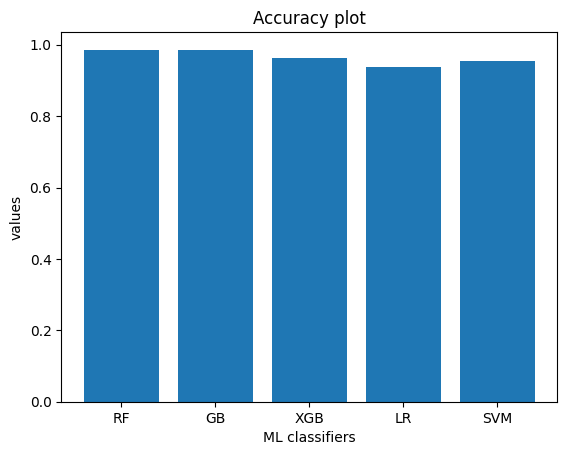

In [ ]:
import matplotlib.pyplot as plt

# Sample data
x = ['RF', 'GB', 'XGB', 'LR','SVM']
y = [A, B, C, D, E]

# Create a bar plot
plt.bar(x, y)

# Set the title and labels for the plot
plt.title('Accuracy plot')
plt.xlabel('ML classifiers')
plt.ylabel('values')

# Show the plot
plt.show()

DATA SET 4 [ BLOOD TEST ]

In [ ]:
df=pd.read_csv("upsampled_kidney_disease.csv")

In [ ]:
df

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,102,17.0,60.0,1.010,0.0,0.0,NaN,normal,notpresent,notpresent,...,52.0,7000.0,NaN,no,no,no,good,no,no,1
1,348,38.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,44.0,7300.0,6.4,no,no,no,good,no,no,0
2,270,23.0,80.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,41.0,7200.0,5.0,no,no,no,good,no,no,0
3,106,50.0,90.0,NaN,NaN,NaN,NaN,NaN,notpresent,notpresent,...,17.0,6500.0,NaN,yes,yes,no,good,yes,yes,1
4,71,46.0,60.0,1.010,1.0,0.0,normal,normal,notpresent,notpresent,...,28.0,14600.0,3.2,yes,yes,no,good,no,no,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,226,64.0,100.0,1.015,4.0,2.0,abnormal,abnormal,notpresent,present,...,26.0,7500.0,3.4,yes,yes,no,good,yes,no,1
996,370,69.0,70.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,50.0,9300.0,5.4,no,no,no,good,no,no,0
997,14,68.0,80.0,1.010,3.0,2.0,normal,abnormal,present,present,...,16.0,11000.0,2.6,yes,yes,yes,poor,yes,no,1
998,191,NaN,70.0,1.010,3.0,0.0,normal,normal,notpresent,notpresent,...,26.0,9200.0,3.4,yes,yes,no,poor,no,no,1


In [ ]:
columns_to_drop = ['id', 'al','rbc','pc','pcc','ba','pot','wc','cad','appet','pe','ane','age','dm','sg','htn','bp','su']
df=df.drop(columns=columns_to_drop)
df.to_csv('DB4.csv', index=False)

In [ ]:
db4=pd.read_csv("DB4.csv")
db4

,bgr,bu,sc,sod,hemo,pcv,rc,classification
0,92.0,32.0,2.1,141.0,13.9,52.0,NaN,1
1,99.0,19.0,0.5,147.0,13.6,44.0,6.4,0
2,111.0,34.0,1.1,145.0,14.3,41.0,5.0,0
3,89.0,118.0,6.1,127.0,6.0,17.0,NaN,1
4,163.0,92.0,3.3,141.0,9.8,28.0,3.2,1
...,...,...,...,...,...,...,...,...
995,163.0,54.0,7.2,140.0,7.9,26.0,3.4,1
996,83.0,42.0,1.2,139.0,16.2,50.0,5.4,0
997,157.0,90.0,4.1,130.0,5.6,16.0,2.6,1
998,110.0,115.0,6.0,134.0,9.1,26.0,3.4,1


In [ ]:
for col in df.columns:
  if db4[col].dtypes=='float64':
    mean=db4[col].mean()
    db4[col].fillna(mean,inplace=True)

In [ ]:
cat_cols = db4.select_dtypes(include='object').columns
for col in cat_cols:
    mode_val = db4[col].mode()[0]
    db4[col].fillna(mode_val, inplace=True)

In [ ]:
label_encoder = preprocessing.LabelEncoder()
obj_cols = db4.select_dtypes(include=['object']).columns
for col in obj_cols:
    label_encoder.fit(db4[col].unique())
    db4[col] = label_encoder.transform(db4[col])



In [ ]:
db4.isnull().sum()

bgr               0
bu                0
sc                0
sod               0
hemo              0
pcv               0
rc                0
classification    0
dtype: int64

RANDOM FOREST

In [ ]:
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
# Define the number of folds
n_splits = 10

# Initialize the KFold splitter
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Initialize the classifier
clf = RandomForestClassifier(n_estimators=10, max_depth=5, random_state=2)

# Initialize the score list
scores = []
f1_scores = []
specificities = []
sensitivities = []
precisions = []
auc_scores = []

# Loop over the splits and train/evaluate the model
for i, (train_index, test_index) in enumerate(kf.split(df)):
    X_train, X_test = db4.iloc[train_index, :-1], db4.iloc[test_index, :-1]
    y_train, y_test = db4.iloc[train_index, -1], db4.iloc[test_index, -1]
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    f1_score = report['1']['f1-score']
    specificity = report['0']['recall']
    sensitivity = report['1']['recall']
    precision = report['1']['precision']
    auc_score = roc_auc_score(y_test, y_pred)
    scores.append(score)
    f1_scores.append(f1_score)
    specificities.append(specificity)
    sensitivities.append(sensitivity)
    precisions.append(precision)
    auc_scores.append(auc_score)

# Compute the average scores
A=mean_score = sum(scores) / len(scores)
mean_f1_score = sum(f1_scores) / len(f1_scores)
mean_specificity = sum(specificities) / len(specificities)
mean_sensitivity = sum(sensitivities) / len(sensitivities)
mean_precision = sum(precisions) / len(precisions)
mean_auc_score = sum(auc_scores) / len(auc_scores)
print(f'Average score: {mean_score:.2f}, F1: {mean_f1_score:.2f}, Specificity: {mean_specificity:.2f}, Sensitivity: {mean_sensitivity:.2f}, Precision: {mean_precision:.2f}, AUC: {mean_auc_score:.2f}')


Average score: 0.99, F1: 0.99, Specificity: 0.99, Sensitivity: 0.99, Precision: 0.99, AUC: 0.99


GRADIENT BOOSTING

In [ ]:
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
# Define the number of folds
n_splits = 10

# Initialize the KFold splitter
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Initialize the classifier
gbclf = GradientBoostingClassifier(n_estimators=10, max_depth=5)

# Initialize the score list
scores = []
f1_scores = []
specificities = []
sensitivities = []
precisions = []
auc_scores = []

# Loop over the splits and train/evaluate the model
for i, (train_index, test_index) in enumerate(kf.split(df)):
    X_train, X_test = db4.iloc[train_index, :-1], db4.iloc[test_index, :-1]
    y_train, y_test = db4.iloc[train_index, -1], db4.iloc[test_index, -1]
    gbclf.fit(X_train, y_train)
    y_pred = gbclf.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    f1_score = report['1']['f1-score']
    specificity = report['0']['recall']
    sensitivity = report['1']['recall']
    precision = report['1']['precision']
    auc_score = roc_auc_score(y_test, y_pred)
    scores.append(score)
    f1_scores.append(f1_score)
    specificities.append(specificity)
    sensitivities.append(sensitivity)
    precisions.append(precision)
    auc_scores.append(auc_score)

# Compute the average scores
B=mean_score = sum(scores) / len(scores)
mean_f1_score = sum(f1_scores) / len(f1_scores)
mean_specificity = sum(specificities) / len(specificities)
mean_sensitivity = sum(sensitivities) / len(sensitivities)
mean_precision = sum(precisions) / len(precisions)
mean_auc_score = sum(auc_scores) / len(auc_scores)
print(f'Average score: {mean_score:.2f}, F1: {mean_f1_score:.2f}, Specificity: {mean_specificity:.2f}, Sensitivity: {mean_sensitivity:.2f}, Precision: {mean_precision:.2f}, AUC: {mean_auc_score:.2f}')


Average score: 0.99, F1: 0.99, Specificity: 0.99, Sensitivity: 0.99, Precision: 0.99, AUC: 0.99


XG BOOSTING

In [ ]:
import pandas as pd
from sklearn.model_selection import KFold
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
# Define the number of folds
n_splits = 10
X = db4.drop('classification', axis=1) # select all columns except the target column
y = db4['classification']
# Initialize the KFold splitter
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
xgb_model = xgb.XGBClassifier(eta=0.01,max_depth=3, colsample_bytree=0.2, scale_pos_weight=1.1, booster='gbtree')

# Initialize the score list
scores = []
f1_scores = []
specificities = []
sensitivities = []
precisions = []
auc_scores = []

# Loop over the splits and train/evaluate the model
for i, (train_index, test_index) in enumerate(kf.split(df)):
    X_train, X_test = db4.iloc[train_index, :-1], db4.iloc[test_index, :-1]
    y_train, y_test = db4.iloc[train_index, -1], db4.iloc[test_index, -1]
    xgb_model.fit(X_train._get_numeric_data(), np.ravel(y_train, order='C'))
    y_pred = xgb_model.predict(X_test._get_numeric_data())
    y_prob = xgb_model.predict_proba(X_test._get_numeric_data())[:,1]  # probability of positive class
    score = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    f1_score = report['1']['f1-score']
    specificity = report['0']['recall']
    sensitivity = report['1']['recall']
    precision = report['1']['precision']
    auc_score = roc_auc_score(y_test, y_prob)
    scores.append(score)
    f1_scores.append(f1_score)
    specificities.append(specificity)
    sensitivities.append(sensitivity)
    precisions.append(precision)
    auc_scores.append(auc_score)

# Compute the average scores
C=mean_score = sum(scores) / len(scores)
mean_f1_score = sum(f1_scores) / len(f1_scores)
mean_specificity = sum(specificities) / len(specificities)
mean_sensitivity = sum(sensitivities) / len(sensitivities)
mean_precision = sum(precisions) / len(precisions)
mean_auc_score = sum(auc_scores) / len(auc_scores)
print(f'Average score: {mean_score:.2f}, F1: {mean_f1_score:.2f}, Specificity: {mean_specificity:.2f}, Sensitivity: {mean_sensitivity:.2f}, Precision: {mean_precision:.2f}, AUC: {mean_auc_score:.2f}')


Average score: 0.97, F1: 0.97, Specificity: 0.96, Sensitivity: 0.97, Precision: 0.97, AUC: 1.00


LOGISTIC REGRESSION

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
# Define the number of folds
n_splits = 10
X = db4.drop('classification', axis=1) # select all columns except the target column
y = db4['classification']
# Initialize the KFold splitter
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Initialize the classifier
lr = LogisticRegression()

# Initialize the score list
scores = []
f1_scores = []
specificities = []
sensitivities = []
precisions = []
auc_scores = []

# Loop over the splits and train/evaluate the model
for i, (train_index, test_index) in enumerate(kf.split(df)):
    X_train, X_test = db4.iloc[train_index, :-1], db4.iloc[test_index, :-1]
    y_train, y_test = db4.iloc[train_index, -1], db4.iloc[test_index, -1]
    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    f1_score = report['1']['f1-score']
    specificity = report['0']['recall']
    sensitivity = report['1']['recall']
    precision = report['1']['precision']
    auc_score = roc_auc_score(y_test, y_pred)
    scores.append(score)
    f1_scores.append(f1_score)
    specificities.append(specificity)
    sensitivities.append(sensitivity)
    precisions.append(precision)
    auc_scores.append(auc_score)

# Compute the average scores
D=mean_score = sum(scores) / len(scores)
mean_f1_score = sum(f1_scores) / len(f1_scores)
mean_specificity = sum(specificities) / len(specificities)
mean_sensitivity = sum(sensitivities) / len(sensitivities)
mean_precision = sum(precisions) / len(precisions)
mean_auc_score = sum(auc_scores) / len(auc_scores)
print(f'Average score: {mean_score:.2f}, F1: {mean_f1_score:.2f}, Specificity: {mean_specificity:.2f}, Sensitivity: {mean_sensitivity:.2f}, Precision: {mean_precision:.2f}, AUC: {mean_auc_score:.2f}')


Average score: 0.94, F1: 0.95, Specificity: 0.91, Sensitivity: 0.95, Precision: 0.95, AUC: 0.93


SUPPORT VECTOR MACHINE

In [ ]:
from sklearn.model_selection import cross_val_predict, StratifiedKFold
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, accuracy_score
X = db4.drop('classification', axis=1)
y = db4['classification']
# define SVM classifier with desired hyperparameters
svm = SVC(kernel='rbf', C=15, gamma=0.5)

# perform 10-fold cross-validation
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
y_pred = cross_val_predict(svm, X, y, cv=cv)

# calculate evaluation metrics
tn, fp, fn, tp = confusion_matrix(y, y_pred).ravel()
specificity = tn / (tn+fp)
sensitivity = recall_score(y, y_pred)
auc = roc_auc_score(y, y_pred)
f1 = f1_score(y, y_pred)
precision = precision_score(y, y_pred)
E=accuracy = accuracy_score(y, y_pred)

# print the evaluation metrics
print("Accuracy:", accuracy)
print("Specificity:", specificity)
print("Sensitivity:", sensitivity)
print("AUC:", auc)
print("F1 Score:", f1)
print("Precision:", precision)


Accuracy: 0.964
Specificity: 0.904
Sensitivity: 1.0
AUC: 0.9520000000000001
F1 Score: 0.9720062208398135
Precision: 0.9455370650529501


ACCURACY PLOT

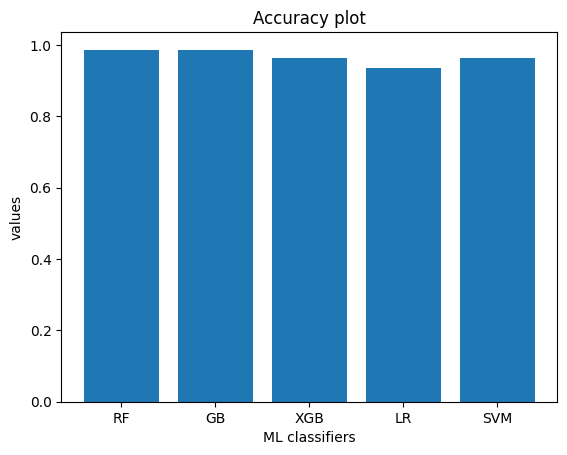

In [ ]:
import matplotlib.pyplot as plt

# Sample data
x = ['RF', 'GB', 'XGB', 'LR','SVM']
y = [A, B, C, D, E]

# Create a bar plot
plt.bar(x, y)

# Set the title and labels for the plot
plt.title('Accuracy plot')
plt.xlabel('ML classifiers')
plt.ylabel('values')

# Show the plot
plt.show()

DATASET SET 5 [ URINE TEST]

In [ ]:
df=pd.read_csv("upsampled_kidney_disease.csv")

In [ ]:
df

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,102,17.0,60.0,1.010,0.0,0.0,NaN,normal,notpresent,notpresent,...,52.0,7000.0,NaN,no,no,no,good,no,no,1
1,348,38.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,44.0,7300.0,6.4,no,no,no,good,no,no,0
2,270,23.0,80.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,41.0,7200.0,5.0,no,no,no,good,no,no,0
3,106,50.0,90.0,NaN,NaN,NaN,NaN,NaN,notpresent,notpresent,...,17.0,6500.0,NaN,yes,yes,no,good,yes,yes,1
4,71,46.0,60.0,1.010,1.0,0.0,normal,normal,notpresent,notpresent,...,28.0,14600.0,3.2,yes,yes,no,good,no,no,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,226,64.0,100.0,1.015,4.0,2.0,abnormal,abnormal,notpresent,present,...,26.0,7500.0,3.4,yes,yes,no,good,yes,no,1
996,370,69.0,70.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,50.0,9300.0,5.4,no,no,no,good,no,no,0
997,14,68.0,80.0,1.010,3.0,2.0,normal,abnormal,present,present,...,16.0,11000.0,2.6,yes,yes,yes,poor,yes,no,1
998,191,NaN,70.0,1.010,3.0,0.0,normal,normal,notpresent,notpresent,...,26.0,9200.0,3.4,yes,yes,no,poor,no,no,1


In [ ]:
columns_to_drop = ['id', 'bp','rbc','pc','pcc','ba','pot','wc','cad','appet','pe','ane','age','dm','hemo','htn','sc','bu','pcv','rc','bgr','sod']
df=df.drop(columns=columns_to_drop)
df.to_csv('DB5.csv', index=False)

In [ ]:
db5=pd.read_csv("DB5.csv")
db5

,sg,al,su,classification
0,1.010,0.0,0.0,1
1,1.020,0.0,0.0,0
2,1.025,0.0,0.0,0
3,NaN,NaN,NaN,1
4,1.010,1.0,0.0,1
...,...,...,...,...
995,1.015,4.0,2.0,1
996,1.020,0.0,0.0,0
997,1.010,3.0,2.0,1
998,1.010,3.0,0.0,1


In [ ]:
df['sg'] = df['sg'].fillna(1.005)

In [ ]:
df['al'] = df['al'].fillna(5)

In [ ]:
import random
lst = [1,2,3,4,5]
df['su'] = df['su'].fillna(random.choice(lst))

In [ ]:
for col in df.columns:
  if db5[col].dtypes=='float64':
    mean=db5[col].mean()
    db5[col].fillna(mean,inplace=True)

In [ ]:
cat_cols = db5.select_dtypes(include='object').columns
for col in cat_cols:
    mode_val = db5[col].mode()[0]
    db5[col].fillna(mode_val, inplace=True)

In [ ]:
label_encoder = preprocessing.LabelEncoder()
obj_cols = db5.select_dtypes(include=['object']).columns
for col in obj_cols:
    label_encoder.fit(db5[col].unique())
    db5[col] = label_encoder.transform(db5[col])



In [ ]:
db5.head()

,sg,al,su,classification
0,1.010000,0.000000,0.000000,1
1,1.020000,0.000000,0.000000,0
2,1.025000,0.000000,0.000000,0
3,1.017387,0.998876,0.434585,1
4,1.010000,1.000000,0.000000,1


RANDOM FOREST

In [ ]:
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
# Define the number of folds
n_splits = 10

# Initialize the KFold splitter
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Initialize the classifier
clf = RandomForestClassifier(n_estimators=10, max_depth=5, random_state=2)

# Initialize the score list
scores = []
f1_scores = []
specificities = []
sensitivities = []
precisions = []
auc_scores = []

# Loop over the splits and train/evaluate the model
for i, (train_index, test_index) in enumerate(kf.split(df)):
    X_train, X_test = db5.iloc[train_index, :-1], db5.iloc[test_index, :-1]
    y_train, y_test = db5.iloc[train_index, -1], db5.iloc[test_index, -1]
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    f1_score = report['1']['f1-score']
    specificity = report['0']['recall']
    sensitivity = report['1']['recall']
    precision = report['1']['precision']
    auc_score = roc_auc_score(y_test, y_pred)
    scores.append(score)
    f1_scores.append(f1_score)
    specificities.append(specificity)
    sensitivities.append(sensitivity)
    precisions.append(precision)
    auc_scores.append(auc_score)

# Compute the average scores
A=mean_score = sum(scores) / len(scores)
mean_f1_score = sum(f1_scores) / len(f1_scores)
mean_specificity = sum(specificities) / len(specificities)
mean_sensitivity = sum(sensitivities) / len(sensitivities)
mean_precision = sum(precisions) / len(precisions)
mean_auc_score = sum(auc_scores) / len(auc_scores)
print(f'Average score: {mean_score:.2f}, F1: {mean_f1_score:.2f}, Specificity: {mean_specificity:.2f}, Sensitivity: {mean_sensitivity:.2f}, Precision: {mean_precision:.2f}, AUC: {mean_auc_score:.2f}')


Average score: 0.98, F1: 0.98, Specificity: 0.98, Sensitivity: 0.98, Precision: 0.99, AUC: 0.98


GRADIENT BOOSTING

In [ ]:
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
# Define the number of folds
n_splits = 10

# Initialize the KFold splitter
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Initialize the classifier
gbclf = GradientBoostingClassifier(n_estimators=10, max_depth=5)

# Initialize the score list
scores = []
f1_scores = []
specificities = []
sensitivities = []
precisions = []
auc_scores = []

# Loop over the splits and train/evaluate the model
for i, (train_index, test_index) in enumerate(kf.split(df)):
    X_train, X_test = db5.iloc[train_index, :-1], db5.iloc[test_index, :-1]
    y_train, y_test = db5.iloc[train_index, -1], db5.iloc[test_index, -1]
    gbclf.fit(X_train, y_train)
    y_pred = gbclf.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    f1_score = report['1']['f1-score']
    specificity = report['0']['recall']
    sensitivity = report['1']['recall']
    precision = report['1']['precision']
    auc_score = roc_auc_score(y_test, y_pred)
    scores.append(score)
    f1_scores.append(f1_score)
    specificities.append(specificity)
    sensitivities.append(sensitivity)
    precisions.append(precision)
    auc_scores.append(auc_score)

# Compute the average scores
B=mean_score = sum(scores) / len(scores)
mean_f1_score = sum(f1_scores) / len(f1_scores)
mean_specificity = sum(specificities) / len(specificities)
mean_sensitivity = sum(sensitivities) / len(sensitivities)
mean_precision = sum(precisions) / len(precisions)
mean_auc_score = sum(auc_scores) / len(auc_scores)
print(f'Average score: {mean_score:.2f}, F1: {mean_f1_score:.2f}, Specificity: {mean_specificity:.2f}, Sensitivity: {mean_sensitivity:.2f}, Precision: {mean_precision:.2f}, AUC: {mean_auc_score:.2f}')


Average score: 0.98, F1: 0.98, Specificity: 0.98, Sensitivity: 0.98, Precision: 0.99, AUC: 0.98


XG BOOSTING

In [ ]:
import pandas as pd
from sklearn.model_selection import KFold
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
# Define the number of folds
n_splits = 10
X = db5.drop('classification', axis=1) # select all columns except the target column
y = db5['classification']
# Initialize the KFold splitter
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
xgb_model = xgb.XGBClassifier(eta=0.01,max_depth=3, colsample_bytree=0.2, scale_pos_weight=1.1, booster='gbtree')

# Initialize the score list
scores = []
f1_scores = []
specificities = []
sensitivities = []
precisions = []
auc_scores = []

# Loop over the splits and train/evaluate the model
for i, (train_index, test_index) in enumerate(kf.split(df)):
    X_train, X_test = db5.iloc[train_index, :-1], db5.iloc[test_index, :-1]
    y_train, y_test = db5.iloc[train_index, -1], db5.iloc[test_index, -1]
    xgb_model.fit(X_train._get_numeric_data(), np.ravel(y_train, order='C'))
    y_pred = xgb_model.predict(X_test._get_numeric_data())
    y_prob = xgb_model.predict_proba(X_test._get_numeric_data())[:,1]  # probability of positive class
    score = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    f1_score = report['1']['f1-score']
    specificity = report['0']['recall']
    sensitivity = report['1']['recall']
    precision = report['1']['precision']
    auc_score = roc_auc_score(y_test, y_prob)
    scores.append(score)
    f1_scores.append(f1_score)
    specificities.append(specificity)
    sensitivities.append(sensitivity)
    precisions.append(precision)
    auc_scores.append(auc_score)

# Compute the average scores
C=mean_score = sum(scores) / len(scores)
mean_f1_score = sum(f1_scores) / len(f1_scores)
mean_specificity = sum(specificities) / len(specificities)
mean_sensitivity = sum(sensitivities) / len(sensitivities)
mean_precision = sum(precisions) / len(precisions)
mean_auc_score = sum(auc_scores) / len(auc_scores)
print(f'Average score: {mean_score:.2f}, F1: {mean_f1_score:.2f}, Specificity: {mean_specificity:.2f}, Sensitivity: {mean_sensitivity:.2f}, Precision: {mean_precision:.2f}, AUC: {mean_auc_score:.2f}')


Average score: 0.98, F1: 0.98, Specificity: 0.98, Sensitivity: 0.97, Precision: 0.99, AUC: 0.98


LOGISTICS REGRESSIN

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
# Define the number of folds
n_splits = 10
X = db5.drop('classification', axis=1) # select all columns except the target column
y = db5['classification']
# Initialize the KFold splitter
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Initialize the classifier
lr = LogisticRegression()

# Initialize the score list
scores = []
f1_scores = []
specificities = []
sensitivities = []
precisions = []
auc_scores = []

# Loop over the splits and train/evaluate the model
for i, (train_index, test_index) in enumerate(kf.split(df)):
    X_train, X_test = db5.iloc[train_index, :-1], db5.iloc[test_index, :-1]
    y_train, y_test = db5.iloc[train_index, -1], db5.iloc[test_index, -1]
    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    f1_score = report['1']['f1-score']
    specificity = report['0']['recall']
    sensitivity = report['1']['recall']
    precision = report['1']['precision']
    auc_score = roc_auc_score(y_test, y_pred)
    scores.append(score)
    f1_scores.append(f1_score)
    specificities.append(specificity)
    sensitivities.append(sensitivity)
    precisions.append(precision)
    auc_scores.append(auc_score)

# Compute the average scores
D=mean_score = sum(scores) / len(scores)
mean_f1_score = sum(f1_scores) / len(f1_scores)
mean_specificity = sum(specificities) / len(specificities)
mean_sensitivity = sum(sensitivities) / len(sensitivities)
mean_precision = sum(precisions) / len(precisions)
mean_auc_score = sum(auc_scores) / len(auc_scores)
print(f'Average score: {mean_score:.2f}, F1: {mean_f1_score:.2f}, Specificity: {mean_specificity:.2f}, Sensitivity: {mean_sensitivity:.2f}, Precision: {mean_precision:.2f}, AUC: {mean_auc_score:.2f}')


Average score: 0.89, F1: 0.90, Specificity: 0.98, Sensitivity: 0.83, Precision: 0.98, AUC: 0.91


SUPPORT VECTOR MACHINE

In [ ]:
from sklearn.model_selection import cross_val_predict, StratifiedKFold
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, accuracy_score
X = db5.drop('classification', axis=1)
y = db5['classification']
# define SVM classifier with desired hyperparameters
svm = SVC(kernel='rbf', C=15, gamma=0.5)

# perform 10-fold cross-validation
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
y_pred = cross_val_predict(svm, X, y, cv=cv)

# calculate evaluation metrics
tn, fp, fn, tp = confusion_matrix(y, y_pred).ravel()
specificity = tn / (tn+fp)
sensitivity = recall_score(y, y_pred)
auc = roc_auc_score(y, y_pred)
f1 = f1_score(y, y_pred)
precision = precision_score(y, y_pred)
E=accuracy = accuracy_score(y, y_pred)

# print the evaluation metrics
print("Accuracy:", accuracy)
print("Specificity:", specificity)
print("Sensitivity:", sensitivity)
print("AUC:", auc)
print("F1 Score:", f1)
print("Precision:", precision)


Accuracy: 0.889
Specificity: 0.9786666666666667
Sensitivity: 0.8352
AUC: 0.9069333333333334
F1 Score: 0.9038961038961041
Precision: 0.9849056603773585


ACCURACY PLOT

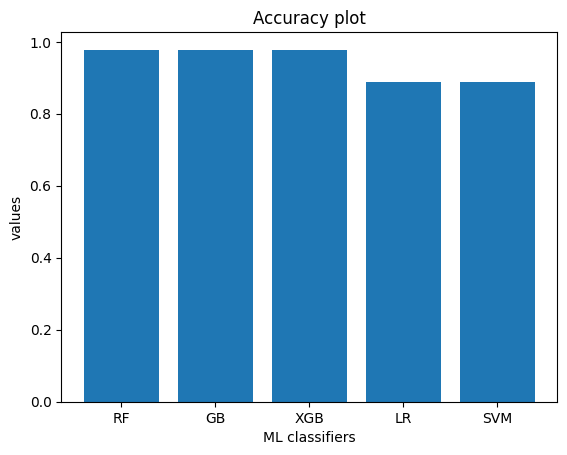

In [ ]:
import matplotlib.pyplot as plt

# Sample data
x = ['RF', 'GB', 'XGB', 'LR','SVM']
y = [A, B, C, D, E]

# Create a bar plot
plt.bar(x, y)

# Set the title and labels for the plot
plt.title('Accuracy plot')
plt.xlabel('ML classifiers')
plt.ylabel('values')

# Show the plot
plt.show()

DATASET 6 [OTHER TESTS]

In [ ]:
df=pd.read_csv("upsampled_kidney_disease.csv")

In [ ]:
df

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,102,17.0,60.0,1.010,0.0,0.0,NaN,normal,notpresent,notpresent,...,52.0,7000.0,NaN,no,no,no,good,no,no,1
1,348,38.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,44.0,7300.0,6.4,no,no,no,good,no,no,0
2,270,23.0,80.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,41.0,7200.0,5.0,no,no,no,good,no,no,0
3,106,50.0,90.0,NaN,NaN,NaN,NaN,NaN,notpresent,notpresent,...,17.0,6500.0,NaN,yes,yes,no,good,yes,yes,1
4,71,46.0,60.0,1.010,1.0,0.0,normal,normal,notpresent,notpresent,...,28.0,14600.0,3.2,yes,yes,no,good,no,no,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,226,64.0,100.0,1.015,4.0,2.0,abnormal,abnormal,notpresent,present,...,26.0,7500.0,3.4,yes,yes,no,good,yes,no,1
996,370,69.0,70.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,50.0,9300.0,5.4,no,no,no,good,no,no,0
997,14,68.0,80.0,1.010,3.0,2.0,normal,abnormal,present,present,...,16.0,11000.0,2.6,yes,yes,yes,poor,yes,no,1
998,191,NaN,70.0,1.010,3.0,0.0,normal,normal,notpresent,notpresent,...,26.0,9200.0,3.4,yes,yes,no,poor,no,no,1


In [ ]:
columns_to_drop = ['id', 'al','rbc','pc','bp','pcc','ba','pot','wc','cad','appet','pe','ane','hemo','sc','bu','pcv','rc','bgr','sod','sg','su']
df=df.drop(columns=columns_to_drop)
df.to_csv('DB6.csv', index=False)

In [ ]:
db6=pd.read_csv("DB6.csv")
db6

,age,htn,dm,classification
0,17.0,no,no,1
1,38.0,no,no,0
2,23.0,no,no,0
3,50.0,yes,yes,1
4,46.0,yes,yes,1
...,...,...,...,...
995,64.0,yes,yes,1
996,69.0,no,no,0
997,68.0,yes,yes,1
998,NaN,yes,yes,1


In [ ]:
for col in df.columns:
  if db6[col].dtypes=='float64':
    mean=db6[col].mean()
    db6[col].fillna(mean,inplace=True)

In [ ]:
cat_cols = db6.select_dtypes(include='object').columns
for col in cat_cols:
    mode_val = db6[col].mode()[0]
    db6[col].fillna(mode_val, inplace=True)

In [ ]:
label_encoder = preprocessing.LabelEncoder()
obj_cols = db6.select_dtypes(include=['object']).columns
for col in obj_cols:
    label_encoder.fit(db6[col].unique())
    db6[col] = label_encoder.transform(db6[col])



RANDOM FOREST

In [ ]:
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
# Define the number of folds
n_splits = 10

# Initialize the KFold splitter
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Initialize the classifier
clf = RandomForestClassifier(n_estimators=10, max_depth=5, random_state=2)

# Initialize the score list
scores = []
f1_scores = []
specificities = []
sensitivities = []
precisions = []
auc_scores = []

# Loop over the splits and train/evaluate the model
for i, (train_index, test_index) in enumerate(kf.split(df)):
    X_train, X_test = db6.iloc[train_index, :-1], db6.iloc[test_index, :-1]
    y_train, y_test = db6.iloc[train_index, -1], db6.iloc[test_index, -1]
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    f1_score = report['1']['f1-score']
    specificity = report['0']['recall']
    sensitivity = report['1']['recall']
    precision = report['1']['precision']
    auc_score = roc_auc_score(y_test, y_pred)
    scores.append(score)
    f1_scores.append(f1_score)
    specificities.append(specificity)
    sensitivities.append(sensitivity)
    precisions.append(precision)
    auc_scores.append(auc_score)

# Compute the average scores
A=mean_score = sum(scores) / len(scores)
mean_f1_score = sum(f1_scores) / len(f1_scores)
mean_specificity = sum(specificities) / len(specificities)
mean_sensitivity = sum(sensitivities) / len(sensitivities)
mean_precision = sum(precisions) / len(precisions)
mean_auc_score = sum(auc_scores) / len(auc_scores)
print(f'Average score: {mean_score:.2f}, F1: {mean_f1_score:.2f}, Specificity: {mean_specificity:.2f}, Sensitivity: {mean_sensitivity:.2f}, Precision: {mean_precision:.2f}, AUC: {mean_auc_score:.2f}')


Average score: 0.88, F1: 0.90, Specificity: 0.95, Sensitivity: 0.84, Precision: 0.97, AUC: 0.90


GRAADIENT BOOSTING

In [ ]:
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
# Define the number of folds
n_splits = 10

# Initialize the KFold splitter
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Initialize the classifier
gbclf = GradientBoostingClassifier(n_estimators=10, max_depth=5)

# Initialize the score list
scores = []
f1_scores = []
specificities = []
sensitivities = []
precisions = []
auc_scores = []

# Loop over the splits and train/evaluate the model
for i, (train_index, test_index) in enumerate(kf.split(df)):
    X_train, X_test = db6.iloc[train_index, :-1], db6.iloc[test_index, :-1]
    y_train, y_test = db6.iloc[train_index, -1], db6.iloc[test_index, -1]
    gbclf.fit(X_train, y_train)
    y_pred = gbclf.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    f1_score = report['1']['f1-score']
    specificity = report['0']['recall']
    sensitivity = report['1']['recall']
    precision = report['1']['precision']
    auc_score = roc_auc_score(y_test, y_pred)
    scores.append(score)
    f1_scores.append(f1_score)
    specificities.append(specificity)
    sensitivities.append(sensitivity)
    precisions.append(precision)
    auc_scores.append(auc_score)

# Compute the average scores
B=mean_score = sum(scores) / len(scores)
mean_f1_score = sum(f1_scores) / len(f1_scores)
mean_specificity = sum(specificities) / len(specificities)
mean_sensitivity = sum(sensitivities) / len(sensitivities)
mean_precision = sum(precisions) / len(precisions)
mean_auc_score = sum(auc_scores) / len(auc_scores)
print(f'Average score: {mean_score:.2f}, F1: {mean_f1_score:.2f}, Specificity: {mean_specificity:.2f}, Sensitivity: {mean_sensitivity:.2f}, Precision: {mean_precision:.2f}, AUC: {mean_auc_score:.2f}')


Average score: 0.88, F1: 0.90, Specificity: 0.95, Sensitivity: 0.84, Precision: 0.97, AUC: 0.89


XG BOOSTING

In [ ]:
import pandas as pd
from sklearn.model_selection import KFold
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
# Define the number of folds
n_splits = 10
X = db6.drop('classification', axis=1) # select all columns except the target column
y = db6['classification']
# Initialize the KFold splitter
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
xgb_model = xgb.XGBClassifier(eta=0.01,max_depth=3, colsample_bytree=0.2, scale_pos_weight=1.1, booster='gbtree')

# Initialize the score list
scores = []
f1_scores = []
specificities = []
sensitivities = []
precisions = []
auc_scores = []

# Loop over the splits and train/evaluate the model
for i, (train_index, test_index) in enumerate(kf.split(df)):
    X_train, X_test = db6.iloc[train_index, :-1], db6.iloc[test_index, :-1]
    y_train, y_test = db6.iloc[train_index, -1], db6.iloc[test_index, -1]
    xgb_model.fit(X_train._get_numeric_data(), np.ravel(y_train, order='C'))
    y_pred = xgb_model.predict(X_test._get_numeric_data())
    y_prob = xgb_model.predict_proba(X_test._get_numeric_data())[:,1]  # probability of positive class
    score = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    f1_score = report['1']['f1-score']
    specificity = report['0']['recall']
    sensitivity = report['1']['recall']
    precision = report['1']['precision']
    auc_score = roc_auc_score(y_test, y_prob)
    scores.append(score)
    f1_scores.append(f1_score)
    specificities.append(specificity)
    sensitivities.append(sensitivity)
    precisions.append(precision)
    auc_scores.append(auc_score)

# Compute the average scores
C=mean_score = sum(scores) / len(scores)
mean_f1_score = sum(f1_scores) / len(f1_scores)
mean_specificity = sum(specificities) / len(specificities)
mean_sensitivity = sum(sensitivities) / len(sensitivities)
mean_precision = sum(precisions) / len(precisions)
mean_auc_score = sum(auc_scores) / len(auc_scores)
print(f'Average score: {mean_score:.2f}, F1: {mean_f1_score:.2f}, Specificity: {mean_specificity:.2f}, Sensitivity: {mean_sensitivity:.2f}, Precision: {mean_precision:.2f}, AUC: {mean_auc_score:.2f}')


Average score: 0.82, F1: 0.86, Specificity: 0.69, Sensitivity: 0.90, Precision: 0.83, AUC: 0.92


LOGISTIC REGRESSION

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
# Define the number of folds
n_splits = 10
X = db6.drop('classification', axis=1) # select all columns except the target column
y = db6['classification']
# Initialize the KFold splitter
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Initialize the classifier
lr = LogisticRegression()

# Initialize the score list
scores = []
f1_scores = []
specificities = []
sensitivities = []
precisions = []
auc_scores = []

# Loop over the splits and train/evaluate the model
for i, (train_index, test_index) in enumerate(kf.split(df)):
    X_train, X_test = db6.iloc[train_index, :-1], db6.iloc[test_index, :-1]
    y_train, y_test = db6.iloc[train_index, -1], db6.iloc[test_index, -1]
    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    f1_score = report['1']['f1-score']
    specificity = report['0']['recall']
    sensitivity = report['1']['recall']
    precision = report['1']['precision']
    auc_score = roc_auc_score(y_test, y_pred)
    scores.append(score)
    f1_scores.append(f1_score)
    specificities.append(specificity)
    sensitivities.append(sensitivity)
    precisions.append(precision)
    auc_scores.append(auc_score)

# Compute the average scores
D=mean_score = sum(scores) / len(scores)
mean_f1_score = sum(f1_scores) / len(f1_scores)
mean_specificity = sum(specificities) / len(specificities)
mean_sensitivity = sum(sensitivities) / len(sensitivities)
mean_precision = sum(precisions) / len(precisions)
mean_auc_score = sum(auc_scores) / len(auc_scores)
print(f'Average score: {mean_score:.2f}, F1: {mean_f1_score:.2f}, Specificity: {mean_specificity:.2f}, Sensitivity: {mean_sensitivity:.2f}, Precision: {mean_precision:.2f}, AUC: {mean_auc_score:.2f}')


Average score: 0.82, F1: 0.84, Specificity: 1.00, Sensitivity: 0.72, Precision: 1.00, AUC: 0.86


SUPPORT VECTOR MACHINE

In [ ]:
from sklearn.model_selection import cross_val_predict, StratifiedKFold
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, accuracy_score
X = db6.drop('classification', axis=1)
y = db6['classification']
# define SVM classifier with desired hyperparameters
svm = SVC(kernel='rbf', C=15, gamma=0.5)

# perform 10-fold cross-validation
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
y_pred = cross_val_predict(svm, X, y, cv=cv)

# calculate evaluation metrics
tn, fp, fn, tp = confusion_matrix(y, y_pred).ravel()
specificity = tn / (tn+fp)
sensitivity = recall_score(y, y_pred)
auc = roc_auc_score(y, y_pred)
f1 = f1_score(y, y_pred)
precision = precision_score(y, y_pred)
E=accuracy = accuracy_score(y, y_pred)

# print the evaluation metrics
print("Accuracy:", accuracy)
print("Specificity:", specificity)
print("Sensitivity:", sensitivity)
print("AUC:", auc)
print("F1 Score:", f1)
print("Precision:", precision)


Accuracy: 0.907
Specificity: 0.912
Sensitivity: 0.904
AUC: 0.908
F1 Score: 0.9239574816026166
Precision: 0.9448160535117057


ACCURACY PLOT

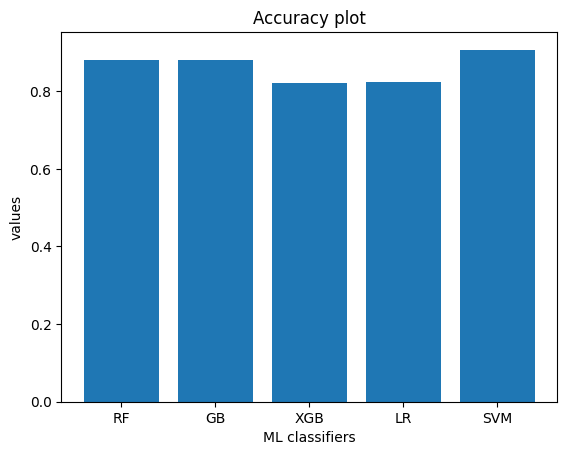

In [ ]:
import matplotlib.pyplot as plt

# Sample data
x = ['RF', 'GB', 'XGB', 'LR','SVM']
y = [A, B, C, D, E]

# Create a bar plot
plt.bar(x, y)

# Set the title and labels for the plot
plt.title('Accuracy plot')
plt.xlabel('ML classifiers')
plt.ylabel('values')

# Show the plot
plt.show()